In [7]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)

In [8]:
# Read CSV
df = pd.read_csv('pose_landmark_data_temp1.csv')

# Drop "presence" column because its worthless as of now
pres = [col for col in df.columns if col.endswith("presence")]
df = df.drop(pres, axis=1)

# Drop Duplicates
df = df.drop_duplicates()

# Remove rows with negative values


# min pose count is 29 poses, sample 25 from each and use rest as validation set
# Try modeling only using sample_df (including CV)
sample_df = df.groupby("pose").apply(lambda x: x.sample(n=25)).reset_index(drop=True)

# unique poses are below. pose_to_chk variable for quick checking pose combos
# that may cause problems.
poses = ['downdog', 'tree', 'boat', 'akarna', 'warrior', 'heron', 'goddess',
         'plank', 'revolved_triangle', 'cobra']
pose_to_chk = ['downdog', 'tree', 'boat', 'akarna', 'warrior', 'heron', 'goddess',
         'plank', 'revolved_triangle', 'cobra']

# Split df into features X and target Y
X = sample_df[sample_df["pose"].isin(pose_to_chk)]
Y = sample_df[sample_df["pose"].isin(pose_to_chk)]["pose"]


In [9]:
df.head()

,filename,kp0_x,kp0_y,kp0_z,kp0_visibility,kp1_x,kp1_y,kp1_z,kp1_visibility,kp2_x,kp2_y,kp2_z,kp2_visibility,kp3_x,kp3_y,kp3_z,kp3_visibility,kp4_x,kp4_y,kp4_z,kp4_visibility,kp5_x,kp5_y,kp5_z,kp5_visibility,kp6_x,kp6_y,kp6_z,kp6_visibility,kp7_x,kp7_y,kp7_z,kp7_visibility,kp8_x,kp8_y,kp8_z,kp8_visibility,kp9_x,kp9_y,kp9_z,kp9_visibility,kp10_x,kp10_y,kp10_z,kp10_visibility,kp11_x,kp11_y,kp11_z,kp11_visibility,kp12_x,kp12_y,kp12_z,kp12_visibility,kp13_x,kp13_y,kp13_z,kp13_visibility,kp14_x,kp14_y,kp14_z,kp14_visibility,kp15_x,kp15_y,kp15_z,kp15_visibility,kp16_x,kp16_y,kp16_z,kp16_visibility,kp17_x,kp17_y,kp17_z,kp17_visibility,kp18_x,kp18_y,kp18_z,kp18_visibility,kp19_x,kp19_y,kp19_z,kp19_visibility,kp20_x,kp20_y,kp20_z,kp20_visibility,kp21_x,kp21_y,kp21_z,kp21_visibility,kp22_x,kp22_y,kp22_z,kp22_visibility,kp23_x,kp23_y,kp23_z,kp23_visibility,kp24_x,kp24_y,kp24_z,kp24_visibility,kp25_x,kp25_y,kp25_z,kp25_visibility,kp26_x,kp26_y,kp26_z,kp26_visibility,kp27_x,kp27_y,kp27_z,kp27_visibility,kp28_x,kp28_y,kp28_z,kp28_visibility,kp29_x,kp29_y,kp29_z,kp29_visibility,kp30_x,kp30_y,kp30_z,kp30_visibility,kp31_x,kp31_y,kp31_z,kp31_visibility,kp32_x,kp32_y,kp32_z,kp32_visibility,pose
0,selected_poses/downdog/00000372.jpg,0.385088,0.702528,-0.004816,0.999651,0.364045,0.705285,-0.031445,0.999706,0.361666,0.700772,-0.031418,0.999722,0.359247,0.696249,-0.031455,0.999732,0.364545,0.705934,0.012564,0.999803,0.362612,0.702185,0.012574,0.999807,0.360539,0.698442,0.012640,0.999787,0.347889,0.649452,-0.107434,0.999471,0.349514,0.653062,0.096620,0.999665,0.390836,0.671910,-0.026318,0.998990,0.392157,0.673101,0.032785,0.998895,0.378512,0.554790,-0.158136,0.998434,0.382461,0.534286,0.182228,0.995969,0.271580,0.751249,-0.332863,0.986403,0.282398,0.694798,0.264100,0.237402,0.141560,0.885363,-0.297492,0.976831,0.187880,0.816904,0.093993,0.515746,0.111090,0.900470,-0.346323,0.967226,0.147252,0.841088,0.091106,0.657172,0.105220,0.890209,-0.301050,0.960469,0.142976,0.845571,0.050253,0.661302,0.116228,0.885947,-0.280730,0.949678,0.152980,0.844001,0.073917,0.656214,0.608500,0.120015,-0.153149,0.997906,0.602633,0.133612,0.153490,0.997630,0.693809,0.520670,-0.114335,0.985941,0.682298,0.503998,0.154914,0.272821,0.856827,0.802559,-0.082929,0.986658,0.835569,0.768468,0.240050,0.469973,0.898328,0.851075,-0.089410,0.982449,0.870051,0.811650,0.241516,0.525770,0.781881,0.930616,-0.215838,0.980343,0.763475,0.904605,0.165073,0.610637,downdog
1,selected_poses/downdog/00000414.jpg,0.715758,0.547609,0.009604,0.999703,0.729912,0.527488,0.021406,0.999708,0.729571,0.523913,0.021355,0.999792,0.728997,0.520017,0.021349,0.999776,0.728891,0.527579,-0.010164,0.999667,0.728052,0.524347,-0.010337,0.999745,0.726990,0.520656,-0.010493,0.999691,0.717463,0.492481,0.074935,0.999670,0.714949,0.493044,-0.074085,0.999574,0.700984,0.538937,0.035487,0.999584,0.700663,0.537634,-0.008677,0.999459,0.668279,0.469275,0.169994,0.996807,0.666239,0.483853,-0.133299,0.999619,0.730803,0.573703,0.232515,0.319049,0.733465,0.594034,-0.244571,0.990065,0.802242,0.659922,0.073137,0.629237,0.825624,0.696864,-0.256677,0.991245,0.827919,0.667661,0.092225,0.796491,0.853622,0.712865,-0.310498,0.975040,0.831558,0.667046,0.035132,0.815176,0.856847,0.703176,-0.259158,0.958774,0.822312,0.665308,0.051728,0.790425,0.847615,0.696975,-0.238337,0.933344,0.483644,0.264283,0.136618,0.999131,0.473814,0.256947,-0.136270,0.999601,0.393279,0.480085,0.183013,0.275508,0.367695,0.472648,-0.069697,0.999127,0.337413,0.633127,0.274084,0.745775,0.286370,0.664694,-0.023070,0.998650,0.307465,0.655862,0.279823,0.847331,0.261937,0.680302,-0.029372,0.998306,0.380548,0.670513,0.219000,0.923418,0.336641,0.713165,-0.141662,0.998337,downdog
2,selected_poses/downdog/00000158.jpg,0.530292,0.608646,-0.049306,0.999273,0.514618,0.623104,-0.070189,0.999622,0.510664,0.621608,-0.070218,0.999613,0.506621,0.619859,-0.070281,0.999652,0.517501,0.626247,-0.035483,0.999619,0.515844,0.627295,-0.035455,0.999531,0.514115,0.628242,-0.035412,0.999539,0.4863

In [10]:
df.query("kp16_visibility < 0").sort_values("kp16_visibility")


,filename,kp0_x,kp0_y,kp0_z,kp0_visibility,kp1_x,kp1_y,kp1_z,kp1_visibility,kp2_x,kp2_y,kp2_z,kp2_visibility,kp3_x,kp3_y,kp3_z,kp3_visibility,kp4_x,kp4_y,kp4_z,kp4_visibility,kp5_x,kp5_y,kp5_z,kp5_visibility,kp6_x,kp6_y,kp6_z,kp6_visibility,kp7_x,kp7_y,kp7_z,kp7_visibility,kp8_x,kp8_y,kp8_z,kp8_visibility,kp9_x,kp9_y,kp9_z,kp9_visibility,kp10_x,kp10_y,kp10_z,kp10_visibility,kp11_x,kp11_y,kp11_z,kp11_visibility,kp12_x,kp12_y,kp12_z,kp12_visibility,kp13_x,kp13_y,kp13_z,kp13_visibility,kp14_x,kp14_y,kp14_z,kp14_visibility,kp15_x,kp15_y,kp15_z,kp15_visibility,kp16_x,kp16_y,kp16_z,kp16_visibility,kp17_x,kp17_y,kp17_z,kp17_visibility,kp18_x,kp18_y,kp18_z,kp18_visibility,kp19_x,kp19_y,kp19_z,kp19_visibility,kp20_x,kp20_y,kp20_z,kp20_visibility,kp21_x,kp21_y,kp21_z,kp21_visibility,kp22_x,kp22_y,kp22_z,kp22_visibility,kp23_x,kp23_y,kp23_z,kp23_visibility,kp24_x,kp24_y,kp24_z,kp24_visibility,kp25_x,kp25_y,kp25_z,kp25_visibility,kp26_x,kp26_y,kp26_z,kp26_visibility,kp27_x,kp27_y,kp27_z,kp27_visibility,kp28_x,kp28_y,kp28_z,kp28_visibility,kp29_x,kp29_y,kp29_z,kp29_visibility,kp30_x,kp30_y,kp30_z,kp30_visibility,kp31_x,kp31_y,kp31_z,kp31_visibility,kp32_x,kp32_y,kp32_z,kp32_visibility,pose


In [11]:
vis = [col for col in df.columns if col.endswith("visibility")]
df[vis].describe().T.sort_values("min")


,count,mean,std,min,25%,50%,75%,max
kp15_visibility,2811.0,0.784404,0.302773,0.002997,0.625925,0.960222,0.989806,0.999852
kp17_visibility,2811.0,0.761321,0.299127,0.004671,0.592942,0.925416,0.974485,0.999138
kp19_visibility,2811.0,0.761858,0.296992,0.004785,0.588770,0.925587,0.973943,0.999078
kp21_visibility,2811.0,0.751122,0.295817,0.004880,0.568096,0.905447,0.968362,0.999097
kp14_visibility,2811.0,0.748255,0.353747,0.005407,0.422436,0.972613,0.993079,0.999954
kp13_visibility,2811.0,0.782272,0.335411,0.005979,0.575949,0.982038,0.995580,0.999986
kp28_visibility,2811.0,0.768761,0.295818,0.007173,0.525506,0.944728,0.990957,0.999797
kp30_visibility,2811.0,0.784884,0.263124,0.007464,0.619259,0.927370,0.983805,0.999744
kp16_visibility,2811.0,0.757829,0.311446,0.008176,0.517061,0.943547,0.984262,0.999634
kp18_visibility,2811.0,0.734913,0.301923,0.009717,0.504818,0.900583,0.963960,0.999373


In [184]:
df[vis].describe().T.sort_values("max").head(5)


,count,mean,std,min,25%,50%,75%,max
kp15_visibility,2082.0,-0.085816,0.248285,-1.534089,-0.260318,-0.086970,0.122875,0.626404
kp4_visibility,2082.0,0.516701,0.111507,0.113337,0.442820,0.524984,0.588123,0.870926
kp7_visibility,2082.0,0.367237,0.163191,-0.078687,0.241851,0.356085,0.467038,0.874255
kp6_visibility,2082.0,0.374988,0.157597,-0.097723,0.254640,0.368446,0.467017,0.904007
kp8_visibility,2082.0,0.389575,0.146644,-0.028557,0.279016,0.387377,0.479794,0.915800


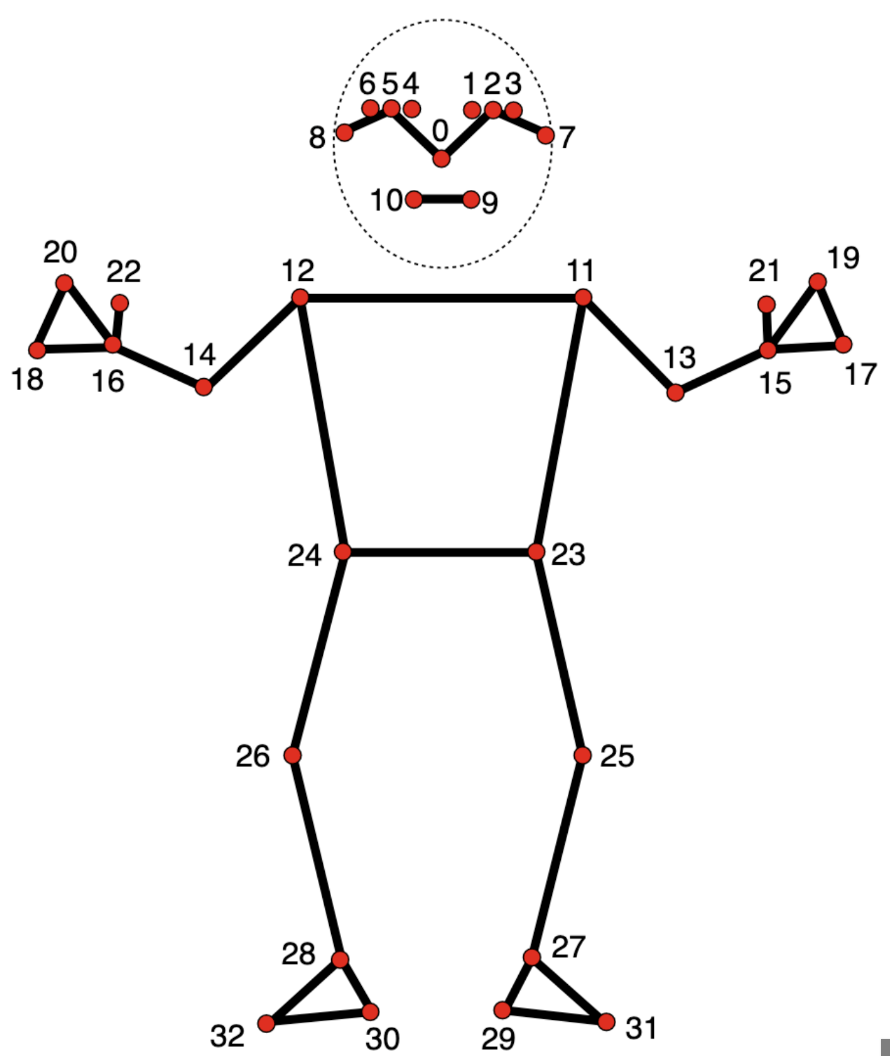
